In [1]:
"""import os
import sys
import torch
from torch.utils.data import Dataset
from pathlib import Path
from torch.utils.data import DataLoader
from utils.train_engine import plot_training_metrics
from utils.datasets import PoseDataset"""

# Bring the Train dataset from Roboflow

In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="2gu9YoCyjq9sNnQaOqVY")
project = rf.workspace("master-thesis-ujksy").project("nomarker")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to noMarker-1 in yolov5pytorch:: 100%|██████████| 5298/5298 [00:05<00:00, 969.01it/s] 


# Preprocess the train images
###### Crop the images in bbox
###### Adjust the keypoints coordinate


In [4]:
from utils.crop_imgs_preprocess import process_images
from utils.crop_imgs_preprocess import rename_images
from utils.crop_imgs_preprocess import rename_labels


image_folder = 'dataset/yoloV5m/train/images'
bbox_folder  = 'dataset/yoloV5m/train/originalYolocropped_train/labels'
keypoints_file = 'dataset/yoloV5m/keypoints.csv'
output_folder = 'dataset/yoloV5m/train/cropped_images'
KP_output_file = 'dataset/yoloV5m/train/modified_keypoints.csv'

original_image_size = (640, 640)


#First rename the images and bbox labels, because they have random names from RoboFlow:
#rename_images(image_folder)
#rename_labels(bbox_folder)

# Cropp the images and save them to a new folder and save the new adjusted keypoints to a new file:
process_images(image_folder, output_folder, bbox_folder, keypoints_file,KP_output_file, original_image_size)


rgb9_2301.jpg 0
Error processing image rgb9_2301.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/train/originalYolocropped_train/labels/rgb9_2301.txt'
rgb5_4651.jpg 1
rgb2_3476.jpg 2
rgb7_3876.jpg 3
rgb5_3101.jpg 4
rgb3_176.jpg 5
rgb2_3551.jpg 6
rgb8_4626.jpg 7
rgb2_3426.jpg 8
rgb6_3351.jpg 9
rgb1_4026.jpg 10
Error processing image rgb1_4026.jpg: too many indices for array: array is 1-dimensional, but 2 were indexed
rgb4_3776.jpg 11
rgb3_2551.jpg 12
rgb6_1951.jpg 13
rgb9_3201.jpg 14
Error processing image rgb9_3201.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/train/originalYolocropped_train/labels/rgb9_3201.txt'
rgb8_1551.jpg 15
rgb5_751.jpg 16
rgb4_1426.jpg 17
rgb2_3751.jpg 18
Error processing image rgb2_3751.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/train/originalYolocropped_train/labels/rgb2_3751.txt'
rgb2_801.jpg 19
rgb4_2401.jpg 20
rgb5_4326.jpg 21
rgb6_2176.jpg 22
Error processing image rgb6_2176.jpg: [Errno 2] No such file or directory: 

# Preprocess the validation images
###### Crop the images in bbox
###### Adjust the keypoints coordinate

In [6]:
from utils.crop_imgs_preprocess import process_images
from utils.crop_imgs_preprocess import rename_images
from utils.crop_imgs_preprocess import rename_labels

image_folder = 'dataset/yoloV5m/val/valll'
bbox_folder =  'dataset/yoloV5m/val/labels'
keypoints_file = 'dataset/yoloV5m/keypoints.csv'
output_folder = 'dataset/yoloV5m/val/cropped_valid'
KP_output_file = 'dataset/yoloV5m/val/modified_keypoints.csv'

original_image_size = (640, 640)


#First rename the images and bbox labels, because they have random names from RoboFlow:
#rename_images(image_folder)
#rename_labels(bbox_folder)

# Cropp the images and save them to a new folder and save the new adjusted keypoints to a new file:
process_images(image_folder, output_folder, bbox_folder, keypoints_file,KP_output_file, original_image_size)

rgb11_3951.jpg 0
Error processing image rgb11_3951.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_3951.txt'
rgb10_4176.jpg 1
rgb11_2676.jpg 2
Error processing image rgb11_2676.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_2676.txt'
rgb10_1451.jpg 3
rgb11_1001.jpg 4
Error processing image rgb11_1001.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_1001.txt'
rgb10_3526.jpg 5
rgb10_3976.jpg 6
rgb11_2951.jpg 7
Error processing image rgb11_2951.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_2951.txt'
rgb11_3526.jpg 8
Error processing image rgb11_3526.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_3526.txt'
rgb11_376.jpg 9
Error processing image rgb11_376.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/val/labels/rgb11_376.txt'
rgb11_2801.jpg 10
Error processing image rgb11_2801.jpg: [Errno 2] No such file or directory: 'dataset/yoloV5m/va

---------------------------------------------------------------------------------------------------------------------

 # Start the training 👌👍🏎️🏁

##### Husk
###### vis_enabled='True' or 'False':
when setting it to True it meanes: use visiblity status labels. given by 0,1 and -1.                        
when setting it to False it meanes: do not use the vis stautes labels. Here it uses all the lables eventhough they are not visible. 

In [3]:
from utils.datasets import PoseDataset

dataset_dir = './dataset/first4000Images'

dataset = PoseDataset(dataset_dir=dataset_dir, is_train=True, vis_enabled='False')

FileNotFoundError: [Errno 2] No such file or directory: './dataset/first4000Images/labels/labels.csv'

In [ ]:
!python train.py --dataset_dir './dataset/first4000Images' --batch_size=16 --epochs=20 --vis_enabled False -p './pretrained_models/pose_hrnet_w48_384x288.pth' 


cuda

 Experiment name: `25.03.2024__12:21` @ 2024-03-25 12:21:21


Loading train and validation datasets...

visibility status is enabled:  False 


loading annotations from:  dataset/first4000Images/train/labels/labels.csv
100%|█████████████████████████████████████| 3776/3776 [00:03<00:00, 1104.72it/s]

loading annotations from:  dataset/first4000Images/val/labels/labels.csv
100%|███████████████████████████████████████| 701/701 [00:00<00:00, 1367.37it/s]
device:  cuda
Tesla V100-PCIE-16GB 
##
Loading pre-trained weights
Load from:  /cluster/home/abdulrna/ondemand/data/sys/dashboard/batch_connect/sys/ntnu_jupyter_advanced/HRNet/ExcPose2D/pretrained_models/pose_hrnet_w48_384x288.pth
Pre-trained weights loaded.
train dataset length:  3776
val dataset length:  704

Training started @ 2024-03-25 12:21:30

------------------------------------

Epoch 1 of 20: 

Training:   0%|                                         | 0/236 [00:00<?, ?it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Fig

 -------------------------------------------------------------------------------------------------------------------------

# Plot the training metrices 🙌

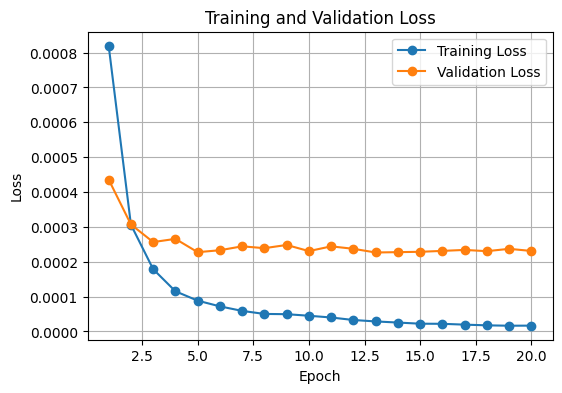

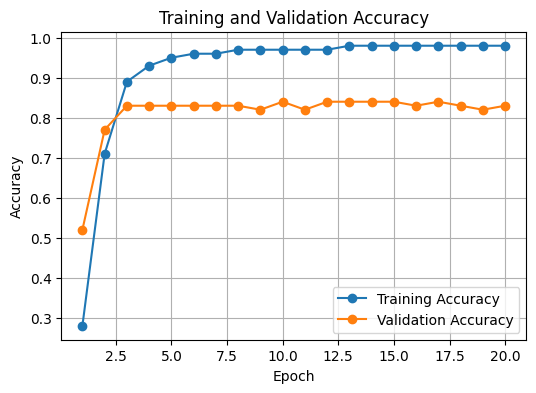

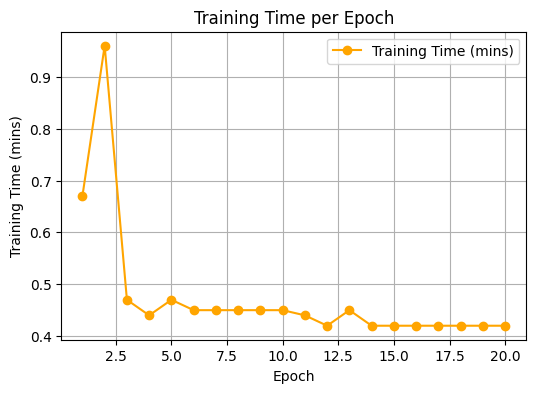

In [10]:
from utils.train_engine import plot_training_metrics


#for 1000 images:
#filename = './logs/17.03.2024__13:08/results.csv'

#for 2000 images:
#filename = './logs/2000/results.csv'

#for 4000 images:
#filename = './logs/4000/results.csv'


#for 6000 images:
#filename = './logs/6000/results.csv'


#for 8000 images:
#filename = './logs/8000/results.csv'


#for 10000 images:
#filename = './logs/10000/results.csv'


#for exclusion of occluded keypoints:
#filename = './logs/visenable_False/results.csv'


#for Yolov5 detected crane:
filename = './logs/yolov5_detected_crane/results.csv'


plot_training_metrics(filename)





----------------------------------------------------------------------------------------------------------------------------

# Train on images without Aruco Markers:

In [ ]:
!python train.py --dataset_dir './dataset/noMarker-1' --batch_size=16 --epochs=20 --vis_enabled True -p './pretrained_models/pose_hrnet_w48_384x288.pth' 


cuda

 Experiment name: `18.03.2024__03:07` @ 2024-03-18 03:07:45


Loading train and validation datasets...

visibility status is enabled:  True 


loading annotations from:  dataset/noMarker-1/train/labels/labels.csv
100%|██████████████████████████████████████| 1808/1808 [00:02<00:00, 816.73it/s]

loading annotations from:  dataset/noMarker-1/val/labels/labels.csv
100%|████████████████████████████████████████| 515/515 [00:00<00:00, 927.23it/s]
device:  cuda
Tesla V100-PCIE-16GB 
##
Loading pre-trained weights
Load from:  /cluster/home/abdulrna/ondemand/data/sys/dashboard/batch_connect/sys/ntnu_jupyter_advanced/HRNet/ExcPose2D/pretrained_models/pose_hrnet_w48_384x288.pth
Pre-trained weights loaded.
train dataset length:  1808
val dataset length:  528

Training started @ 2024-03-18 03:07:51

------------------------------------

Epoch 1 of 20: 

Training:   0%|                                         | 0/113 [00:00<?, ?it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300

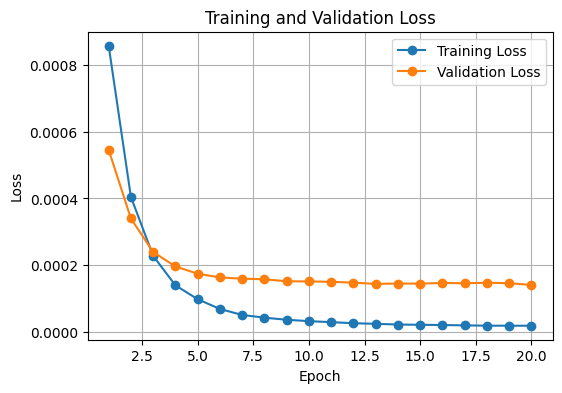

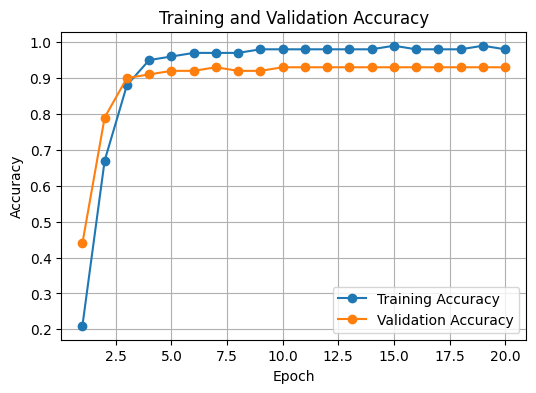

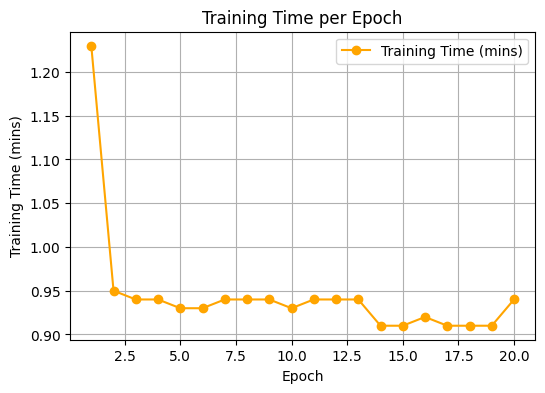

In [1]:
## plot the training detales for no_aruko_markers datasaet

from utils.train_engine import plot_training_metrics

filename = './logs/2000_no_markers/results.csv'

plot_training_metrics(filename)

---------------------------------------------------------------------------------------------------------------

# Train on images with crane detected using YOLOv5

#### This is to test how the results will be affected when we don not have GT for bbox and we use YOLOv5 to detect thoese bbox. this is useful when training on real images.
#### this model traind on this, will also be tested on images cropped using the same YOLOv5 model

In [11]:
# train on thoese images:
!python train.py --dataset_dir './dataset/yoloV5m' --batch_size=16 --epochs=20 --vis_enabled True -p './pretrained_models/pose_hrnet_w48_384x288.pth' 


^C
Traceback (most recent call last):
  File "/cluster/home/abdulrna/ondemand/data/sys/dashboard/batch_connect/sys/ntnu_jupyter_advanced/HRNet/ExcPose2D/train.py", line 17, in <module>
    from utils.train_engine import Train
  File "/cluster/home/abdulrna/ondemand/data/sys/dashboard/batch_connect/sys/ntnu_jupyter_advanced/HRNet/ExcPose2D/utils/train_engine.py", line 19, in <module>
    from misc.visualization import save_images
  File "/cluster/home/abdulrna/ondemand/data/sys/dashboard/batch_connect/sys/ntnu_jupyter_advanced/HRNet/ExcPose2D/misc/visualization.py", line 5, in <module>
    import torchvision
  File "/cluster/home/abdulrna/.local/lib/python3.9/site-packages/torchvision/__init__.py", line 6, in <module>
    from torchvision import _meta_registrations, datasets, io, models, ops, transforms, utils
  File "/cluster/home/abdulrna/.local/lib/python3.9/site-packages/torchvision/models/__init__.py", line 2, in <module>
    from .convnext import *
  File "/cluster/home/abdulrna/.

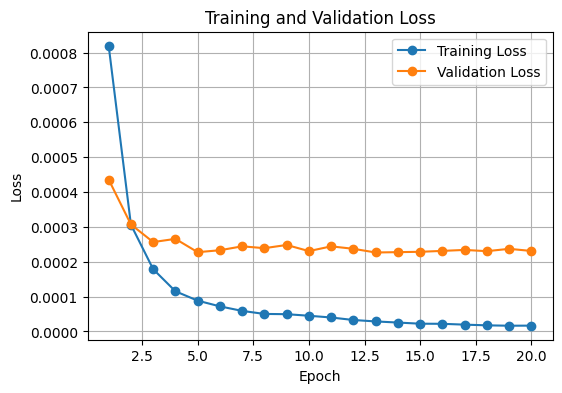

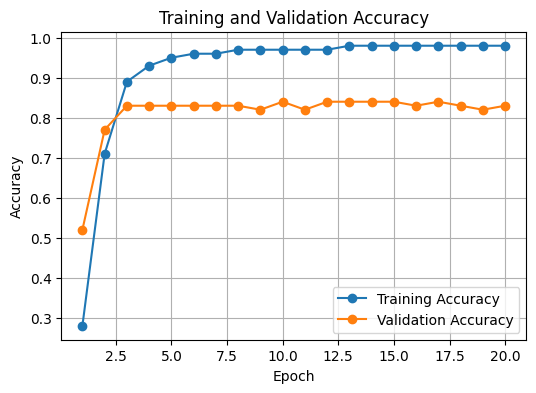

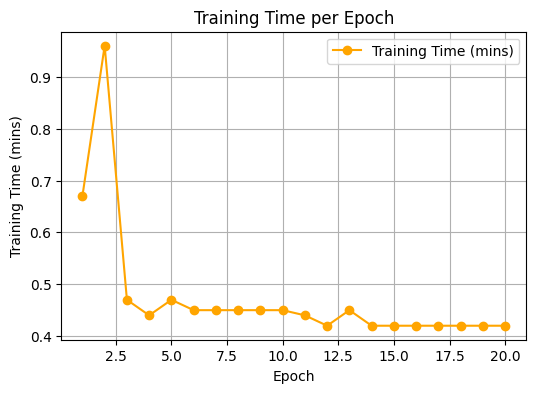

In [8]:
## plot the training detales for yolov5 detected bbox datasaet

from utils.train_engine import plot_training_metrics

filename = './logs/yolov5_detected_crane/results.csv'

plot_training_metrics(filename)

-------------------------------------------------------------------------------------------------------------------------